# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [1]:
install.packages("kohonen")
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("semillas1.txt",dec=".")
datos <- as.data.frame(datos)
dim(datos)
summary(datos)

package 'kohonen' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fabio\AppData\Local\Temp\Rtmpqo1msn\downloaded_packages


[1] 210   6

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

[[1]]
           V1         V2         V3          V4          V5         V6
V1 -0.9886188 -0.9781013 -0.9019465 -1.03530414  0.58627308 -0.6501815
V2 -0.2283528 -0.2662925 -0.3806364 -0.05836485 -1.00338847 -0.7207314
V3  0.4408228  0.5056410  0.5036363  0.41627012  0.16727905  0.5296840
V4  1.4241054  1.4172464  1.4136546  1.30530125 -0.07328373  1.4307335



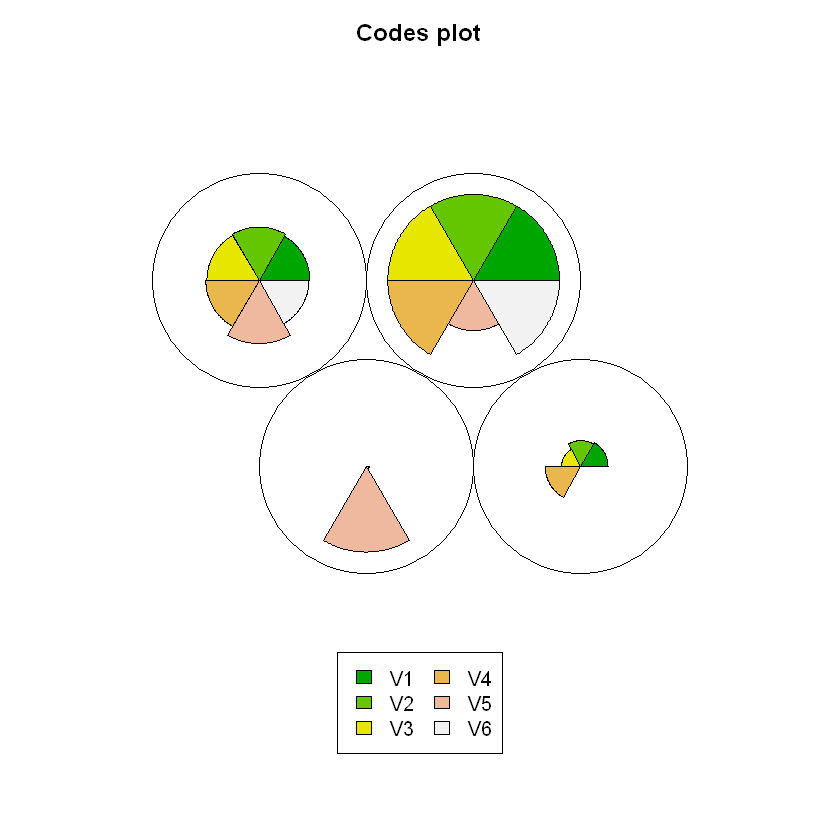

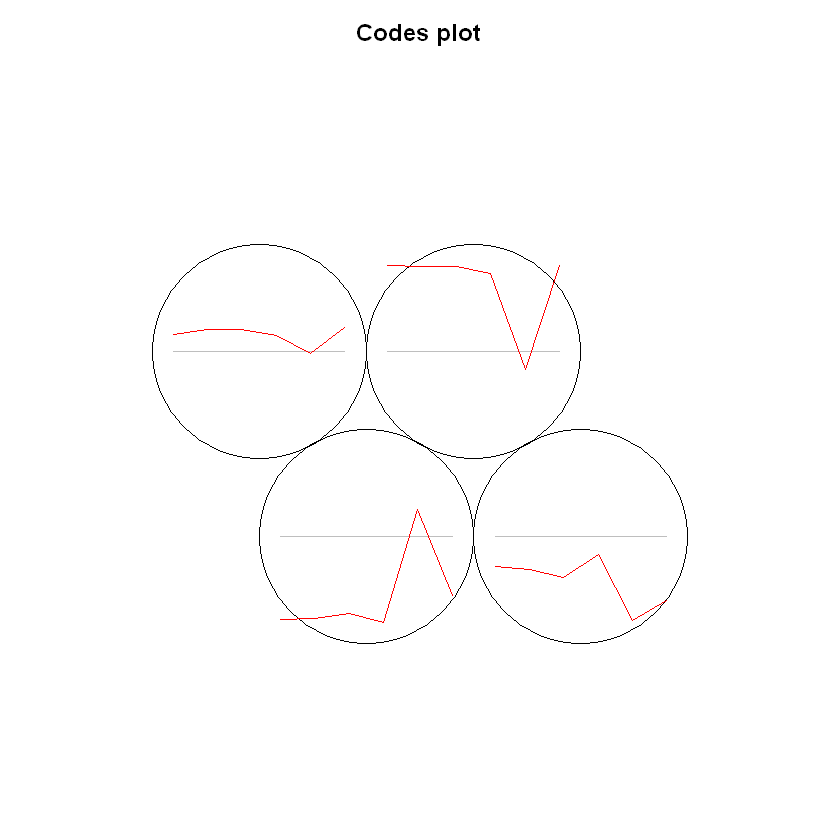

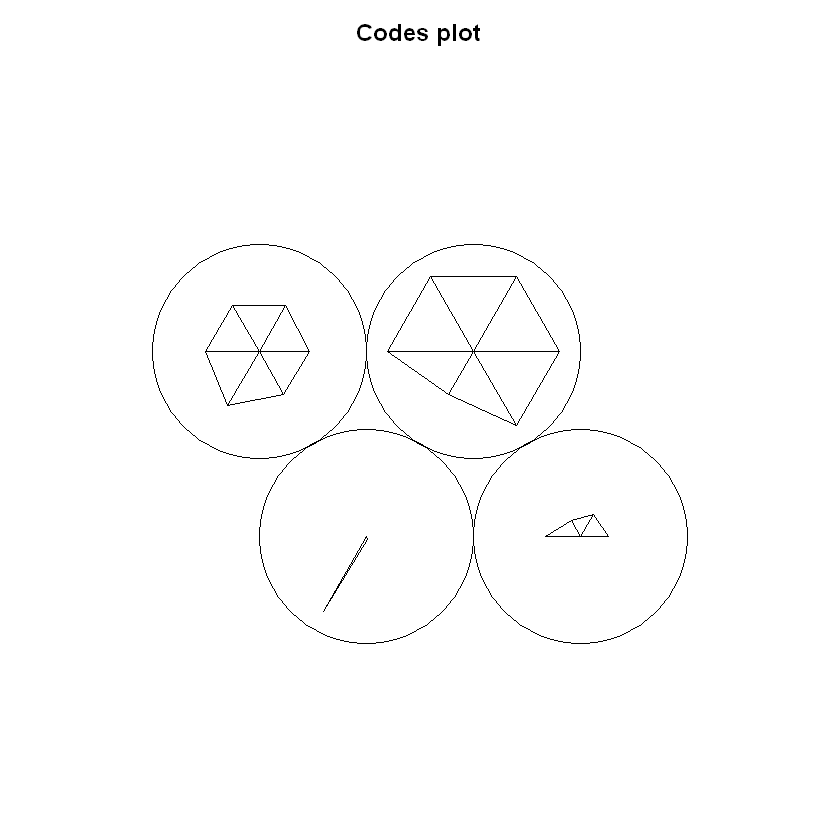

In [2]:
#create SOM grid

#Se define una grilla de 2x2 = 4 grupos con forma hexagonal
#Los datos semillas son 3 grupos
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))

#Pesos de la red neuronal
print(sommap$codes)

#Mapa caracteristico que muestra los datos en los grupos que uno le entrega
#Pesos que tiene cada variable luego del entrenamiento de la red neuronal en forma grafica
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

In [3]:
#La variable 5 permite discriminar a un grupo en particular

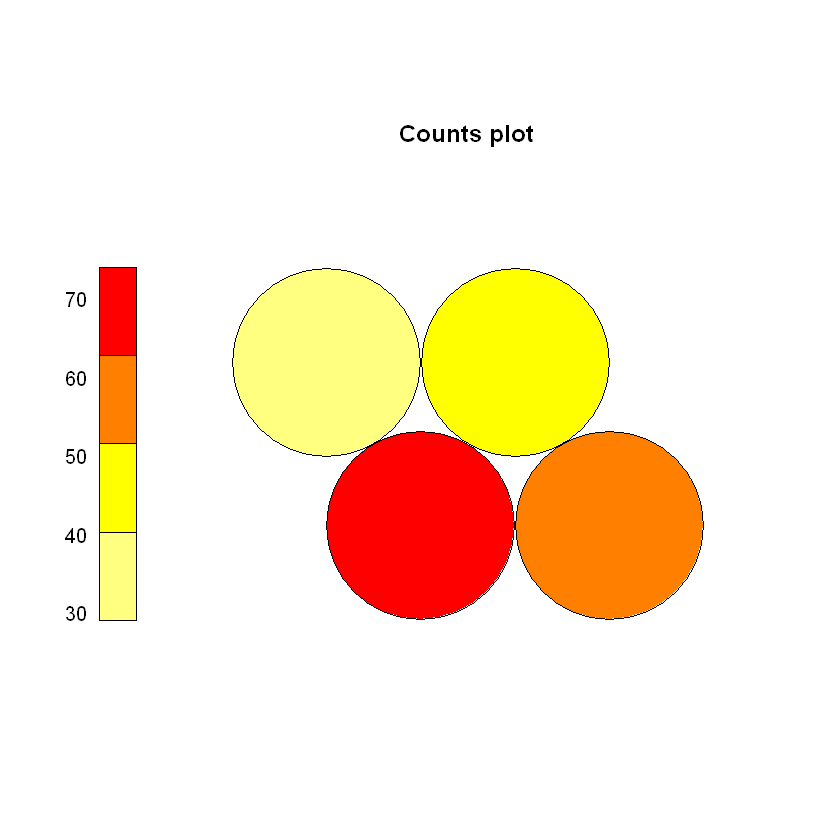

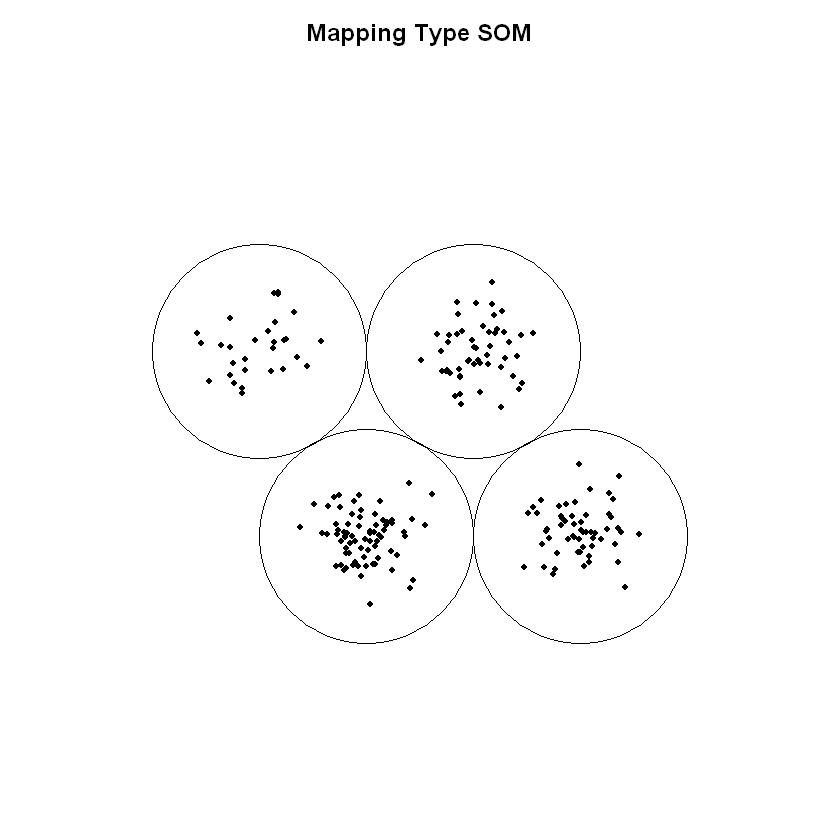

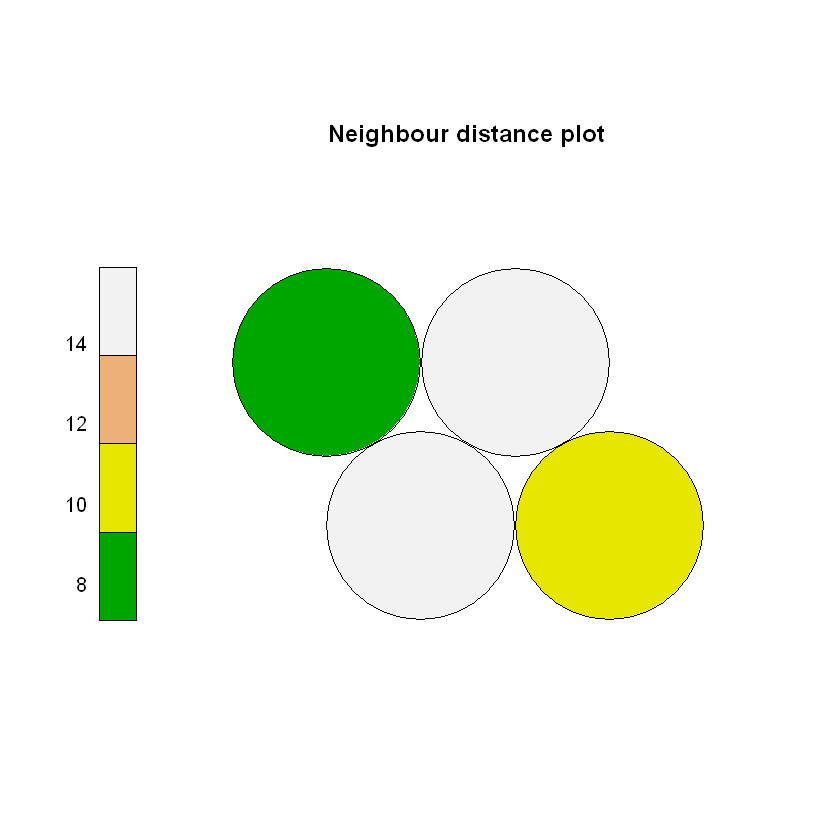

In [4]:
colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

In [5]:
#Proyección y distancias entre cada grupo

**Ejercicio 1:** 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.


In [6]:
help(som)

#Respuesta

#El método som se utiliza para equilibrar y calcular distancias en mapas de autoorganización con múltiples capas de datos. 
#Para evitar que algunas capas dominen sobre otras, la función aplica pesos internos y permite que el usuario especifique pesos 
#adicionales. Estos pesos aseguran que todas las capas contribuyan de manera equitativa a la medida de distancia global. 
#Para conjuntos de datos grandes, se utiliza una muestra para calcular las distancias medias en cada capa. 
#Si se desactiva la normalización de las capas de datos, los pesos del usuario se aplican directamente a los datos. 
#Además, se menciona una definición de la distancia de Tanimoto utilizada en la implementación, que se basa en la fracción de 
#casos en los que dos vectores binarios difieren. Se señala que esta medida no es adecuada si las variables están fuera del rango [0-1].

#Parametros de entrada
#   data: matriz en la que cada fila representa un objeto.
#   grid: cuadrícula para los representantes: ver 'somgrid'.
#   rlen: número de veces que se presentará el conjunto de datos completo a la red.
#   alpha: tasa de aprendizaje, vector de dos números que indica la cantidad de cambio. El valor predeterminado es disminuir linealmente desde 0.05 hasta 0.01 a lo largo de las actualizaciones de rlen.
#   radius: el radio de la vecindad, se proporciona como un número único o un vector (inicio, fin). Si se proporciona como un número único, el radio se extenderá desde ese número hasta el valor negativo de ese número; tan pronto como la vecindad se vuelva más pequeña que uno, solo se actualizará la unidad ganadora. El valor predeterminado es comenzar con un valor que cubra 2/3 de todas las distancias entre unidades.
#   init: los representantes iniciales, representados como una matriz. Si falta, se eligen al azar (sin reemplazo) de 'data'.
#   toroidal: si es TRUE, se unen los bordes del mapa. Tenga en cuenta que en un mapa toroidal hexagonal, el número de filas debe ser par.
#   n.hood: la forma de la vecindad, ya sea "circular" o "cuadrada". La última es la forma predeterminada para mapas rectangulares, y la primera para mapas hexagonales.
#   keep.data: guarda los datos en el objeto de retorno.

#Parametros de salida
#   data: matriz de datos, solo se devuelve si keep.data == TRUE.
#   grid: cuadrícula, un objeto de clase "somgrid".
#   code: suna matriz de vectores de código.
#   changes: vector de desviaciones medias promedio de los vectores de código.
#   unit.classif: unidades ganadoras para todos los objetos de datos, solo se devuelve si keep.data == TRUE.
#   distances: distancias de los objetos a su unidad ganadora correspondiente, solo se devuelve si keep.data == TRUE.
#   toroidal: si se utiliza un mapa toroidal.
#   method: el tipo de som, en este caso "som".

#En los gráficos obtenidos se pueden observar los grupos que se definieron, en este caso G=4 
#Con el comando "print(sommap$codes)" obtenemos los Pesos de la red neuronal
#Mientras que en los gráficos se pueden observar los mapa caracteristico que muestra los datos en los grupos que uno le entrega
#Reciben como entrada los pesos que tiene cada variable luego del entrenamiento de la red neuronal en forma grafica

supersom                package:kohonen                R Documentation

_S_e_l_f- _a_n_d _s_u_p_e_r-_o_r_g_a_n_i_s_i_n_g _m_a_p_s

_D_e_s_c_r_i_p_t_i_o_n:

     A supersom is an extension of self-organising maps (SOMs) to
     multiple data layers, possibly with different numbers and
     different types of variables (though equal numbers of objects).
     NAs are allowed. A weighted distance over all layers is calculated
     to determine the winning units during training.  Functions 'som'
     and 'xyf' are simply wrappers for supersoms with one and two
     layers, respectively. Function 'nunits' is a utility function
     returning the number of units in the map.

_U_s_a_g_e:

     som(X, ...)
     xyf(X, Y, ...)
     supersom(data, grid=somgrid(), rlen = 100, alpha = c(0.05, 0.01),
              radius = quantile(nhbrdist, 2/3), 
              whatmap = NULL, user.weights = 1, maxNA.fraction = 0L,
              keep.data = TRUE, dist.fcts 

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

[[1]]
           V1         V2         V3          V4         V5         V6
V1 -0.1917183 -0.2122232 -0.2821532 -0.04499216 -0.8356105 -0.6281022
V2  1.2208114  1.2332944  1.2292411  1.12266226 -0.0191855  1.2934049
V3 -0.9792698 -0.9641441 -0.8791842 -1.01982050  0.8502453 -0.6002295



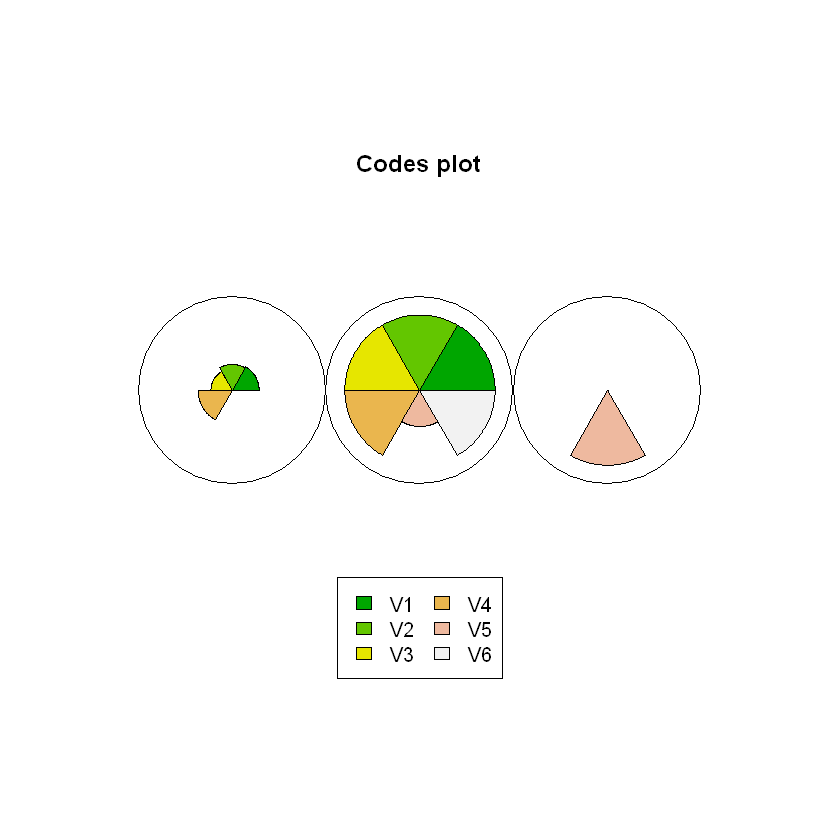

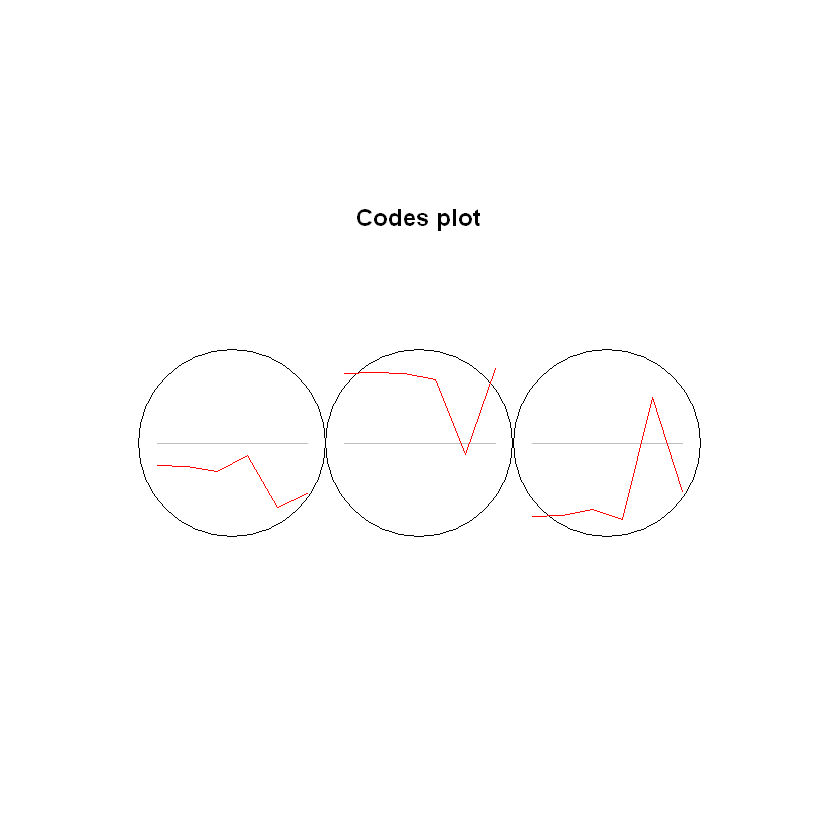

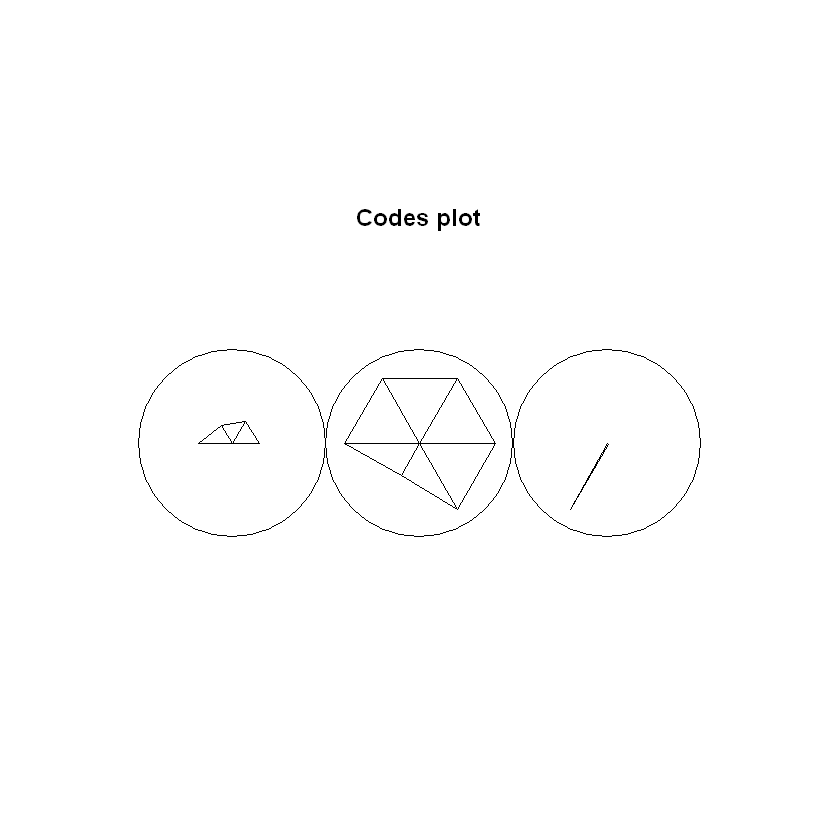

In [7]:
#create SOM grid

#Se define una grilla de 3x1 = 3 grupos con forma rectangular
#Los datos semillas son 3 grupos
sommap <- som(scale(datos), grid = somgrid(3, 1, "rectangular"))

#Pesos de la red neuronal
print(sommap$codes)

#Pesos que tiene cada variable luego del entrenamiento de la red neuronal en forma grafica
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

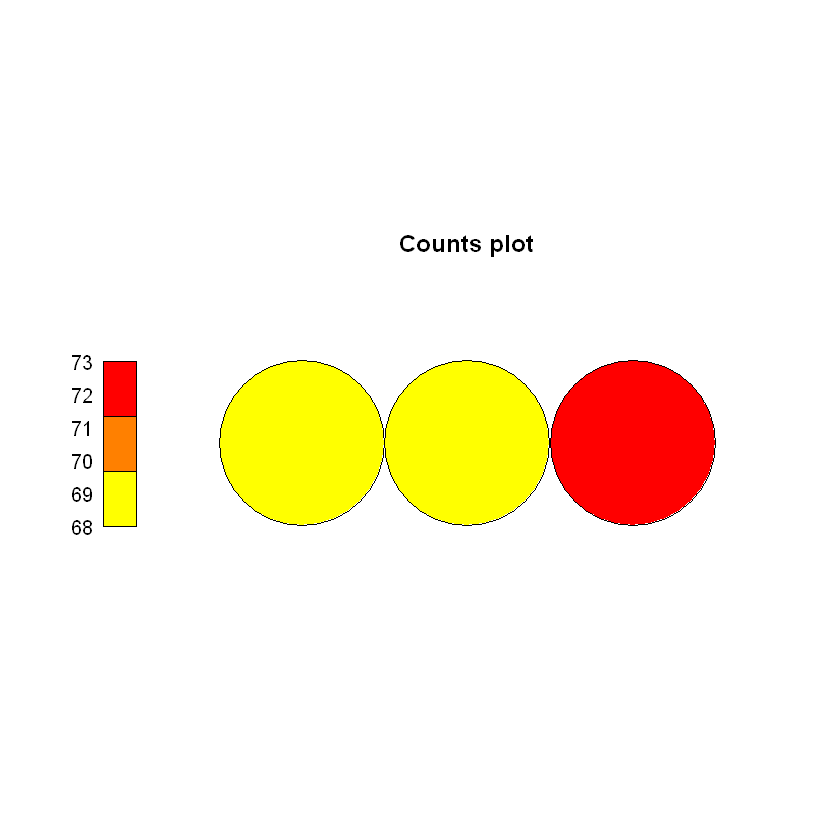

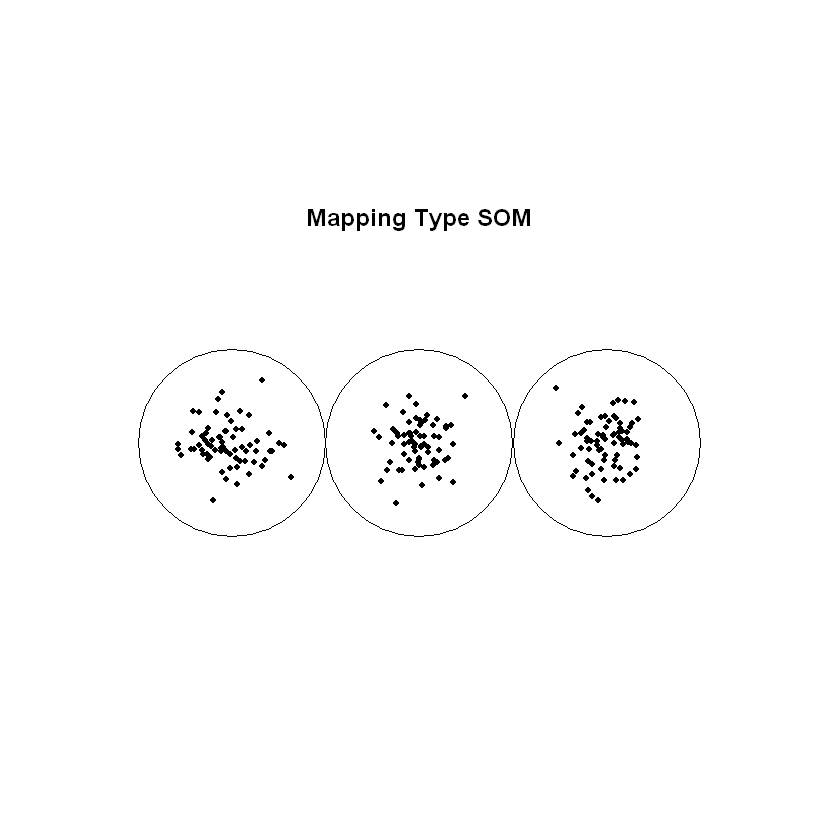

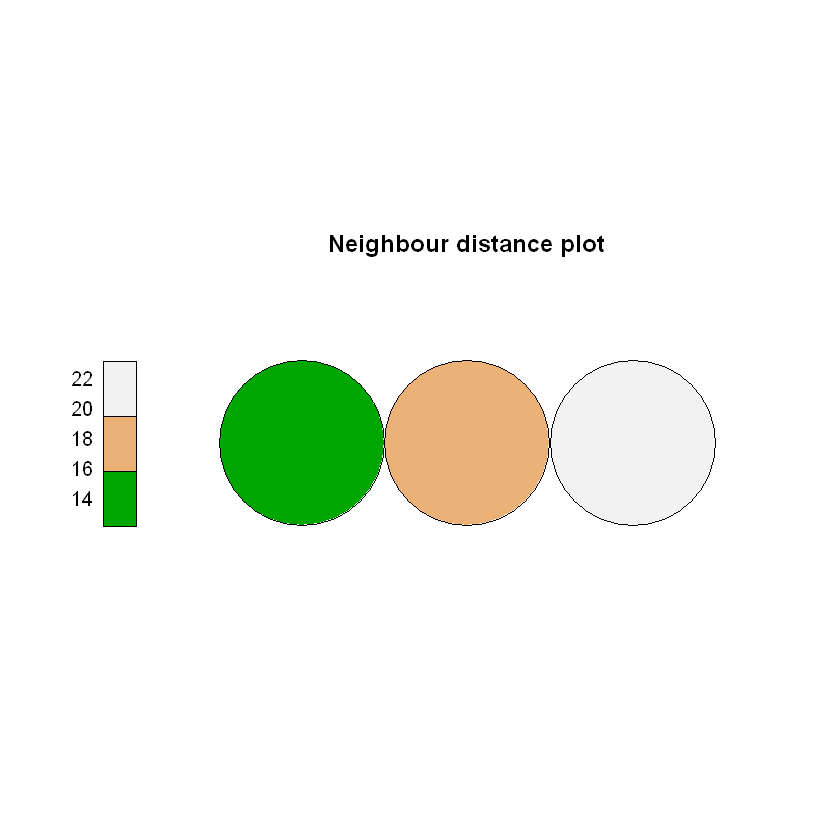

In [11]:
colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

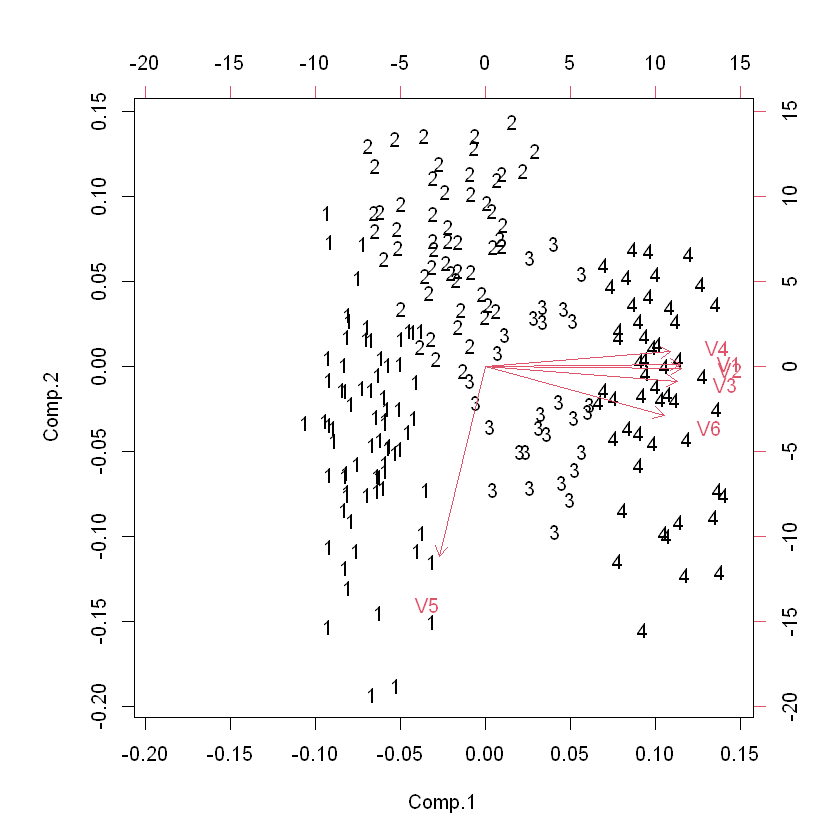

In [12]:
### Diferencias
# 1) Aumentó la distancia entre los vecinos ya que antes se encontraba entre 8 y 10. Y ahora se encuentra entre 14 y 18 (casi el doble)
# 2) Aumentó la densidad gracias a que se redujeron los grupos

#### **Ejercicio 2:**


In [ ]:
res <- princomp(datos, cor=TRUE)
cl <- sommap$unit.classif
biplot(res,xlabs=cl)


a) Explique como funciona esta nueva visualización. Interprete y comente los resultados obtenidos.


In [13]:
#Respuesta
#Las coordenadas de las variables en el gráfico biplot corresponden a los pesos de ellas en cada componente principal 
#(ejes derecho y superior) y en el caso de las observaciones, las coordenadas corresponden a la proyección de cada observación en 
#cada eje principal (ejes izquierdo e inferior).

#De acuerdo a lo observado en el primer plano principal se tiene que las variables V1, V2, V3, V4 y V6 tienen una alta correlación 
#positiva. 
#Por otra parte se observa que la variable V5 tiene una correlación negativa con todas las demás variables.



b) Complete el Ejercicio 4 de la tarea anterior con el agrupamiento que genera el método som con K=3. Compare los resultados de la medida de calidad con los otros tres métodos de clustering. Concluya.

In [14]:
#Respuesta

#### **Ejercicio 3:**

Considere el subconjunto de datos del archivo datosComunas.csv que ha estudiado en las tareas anteriores.

a) Realice el análisis de agrupamiento con SOM y discuta sus resultados 


[[1]]
           A1         A2         A3         A4          A5         A6
V1  0.2918475 -0.5178963 -0.1463255 -0.3430554  0.15262542  0.3659408
V2 -0.2108199  0.9496559 -0.2011435  0.3200200  0.04321147  0.1546583
V3 -0.1822622  0.3786927  0.8498228  0.7944840 -1.42310634 -2.4572054
           A7         A8          A9        A10        A11        A12
V1 -0.5135689 -0.2591223 -0.03734670 -0.3954845  0.1430442 -0.3494687
V2  1.1969251  0.1789471 -0.02967023  0.7596039 -0.6930178  0.7001530
V3 -0.4092637  1.4258882 -0.06947779  0.3069685  0.4804535  0.2184269



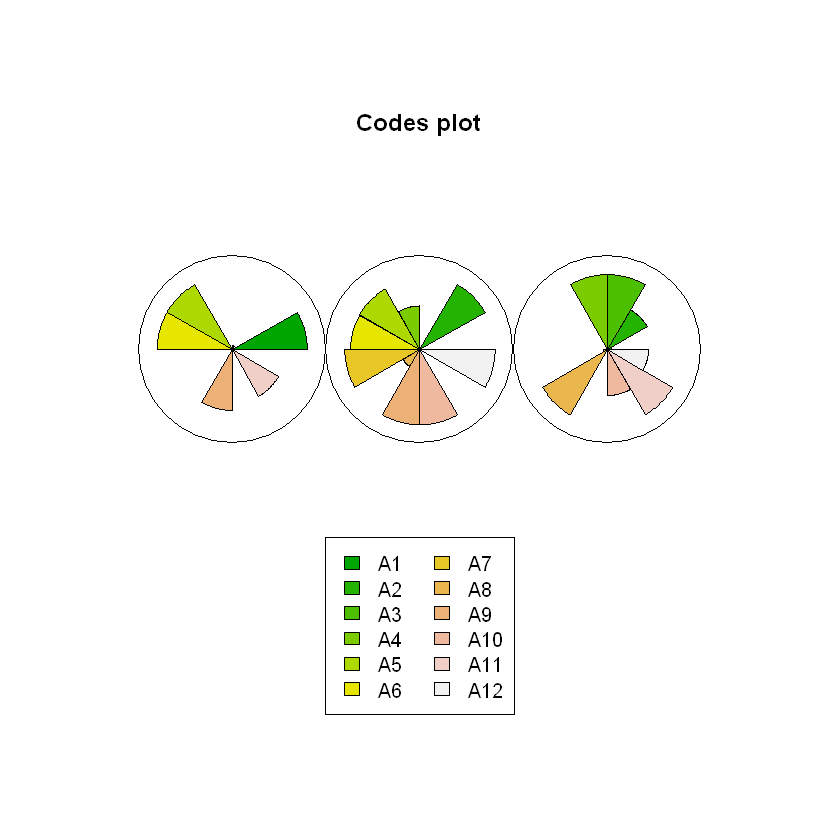

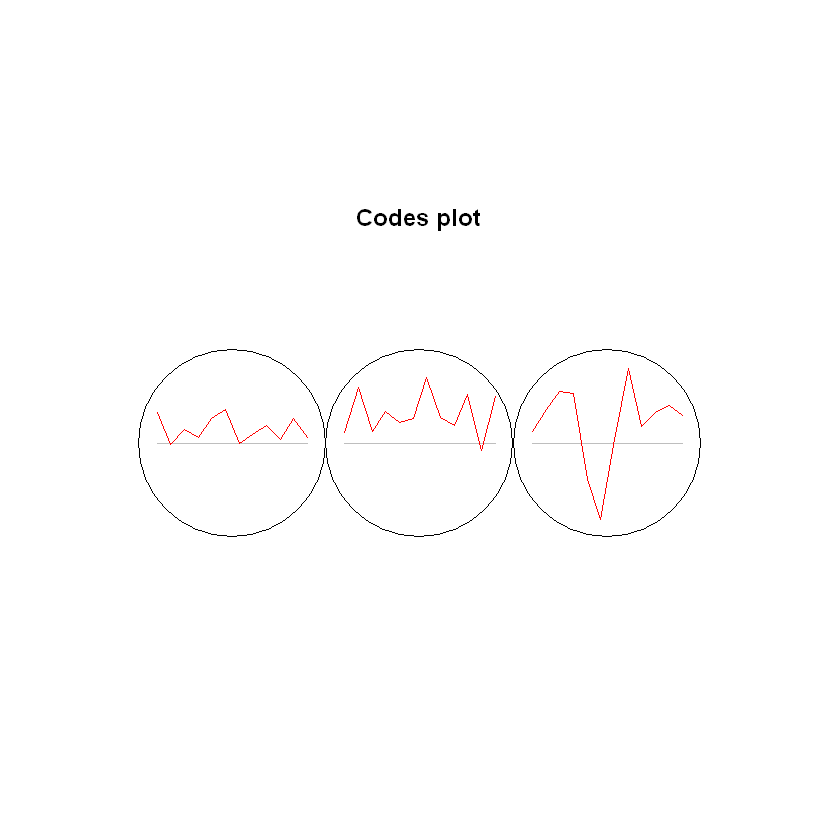

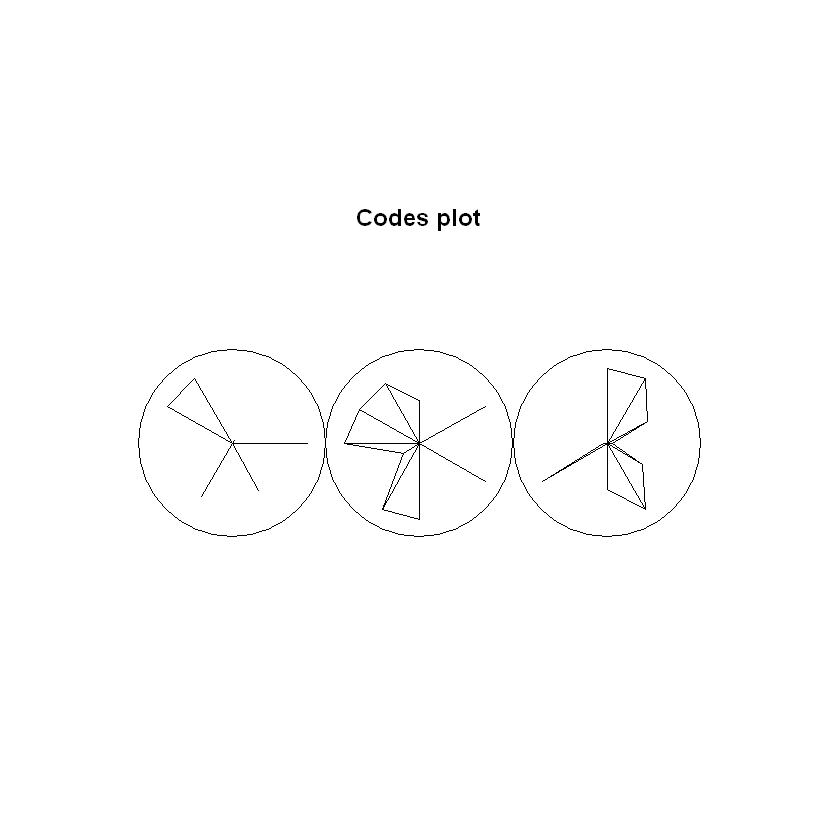

In [28]:
#Respuesta
datosComunas <- read.table("datosComunas.csv",sep=";",dec=",",header= TRUE)

datosSom <- datosComunas[,2:13]

sommap <- som(scale(datosSom), grid = somgrid(3,1, "rectangular"))

#Pesos de la red neuronal
print(sommap$codes)

#Pesos que tiene cada variable luego del entrenamiento de la red neuronal en forma grafica
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")


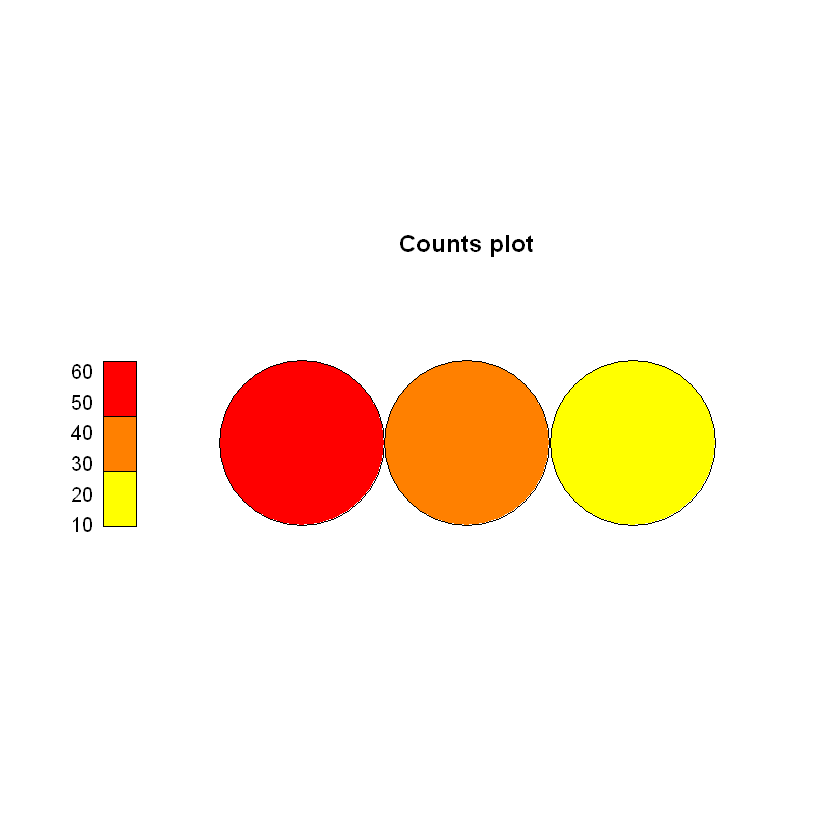

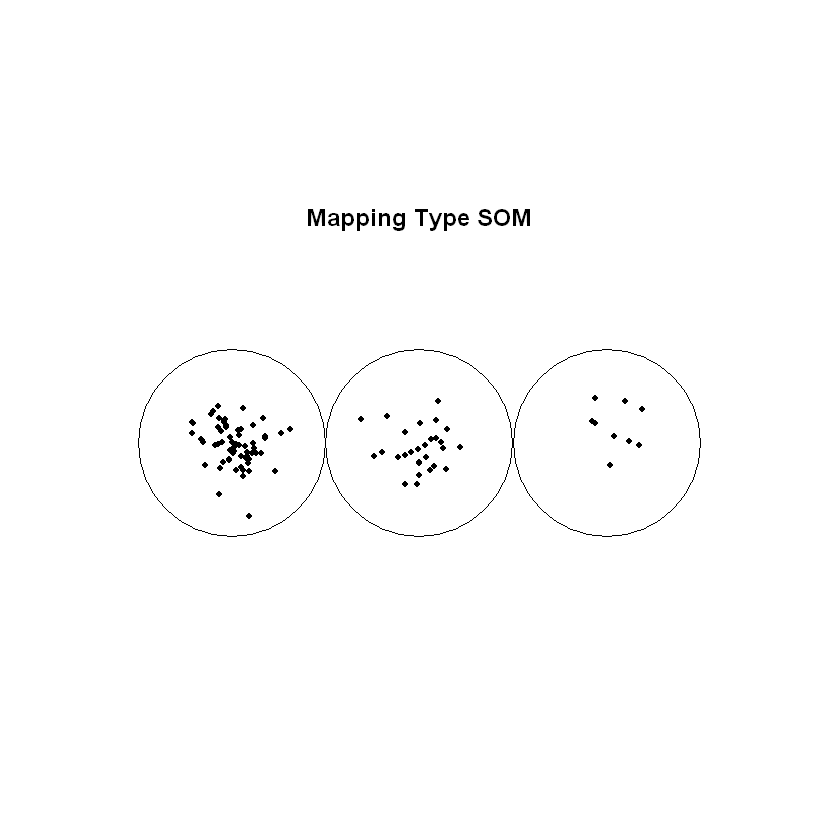

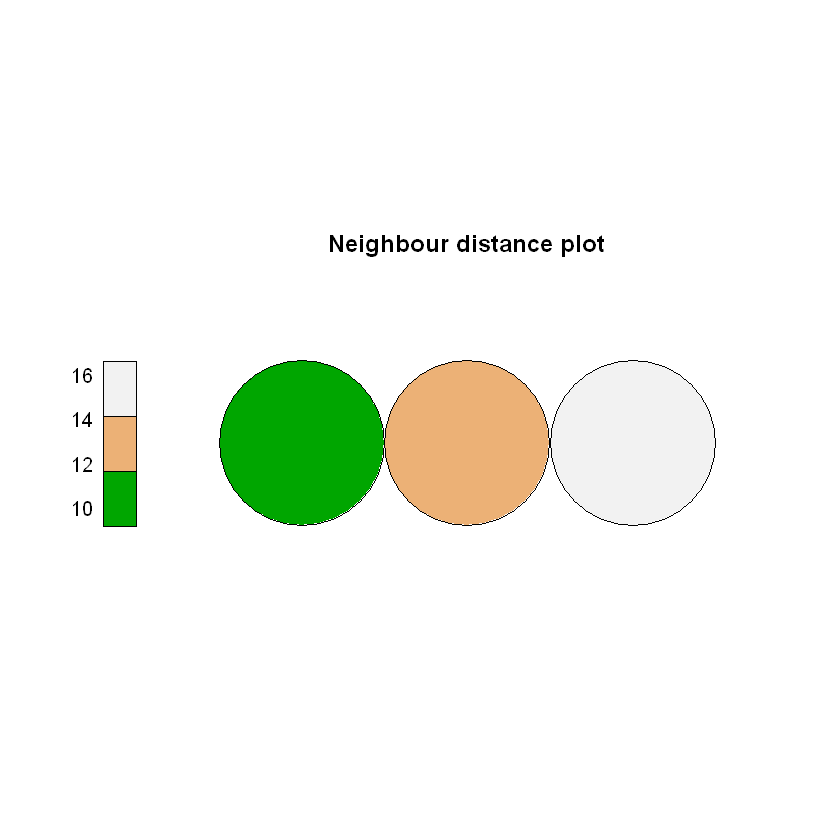

In [29]:
colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

In [ ]:
#Resultados

# Gracias a la tarea 2 se había fijado que el número de grupos más adecuado era 3. Así que fijamos los grupos en 3.
# Viendo los resultados creemos que 


b) Proponga una estrategia gráfica para representarlos.

In [16]:
#Respuesta